In [ ]:
# import os
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

states = [ "A", "B", "C", "D", "E"]  # All states 
n_states = len(states) # Number of non-terminal states
V = np.zeros(n_states)  # The value estimates for states 
alpha = 0.1  # Learning rate
episodes = 100 # Number of episodes
gamma = 1  # Discount factor

episode_values = [] 


def run_episode():
    global V
    current_state = n_states // 2  # Start from the middle state C
    while True:
        action = -1 if np.random.rand() < 0.5 else 1 # -1 is left and +1 is right
        next_state = current_state + action
        # Initialize reward as 0
        reward = 0
        # Moving right from E to Terminal state
        if current_state == n_states - 1 and action == 1:
            reward = 1
            V[current_state] += alpha * (reward - V[current_state])
            break # Update and break since it's a terminal condition
    
        # Moving left from A, which is at index 0 (first index)
        elif current_state == 0 and action == -1:
            V[current_state] += alpha * (reward - V[current_state])
            break # since terminal state at left of A
        # Ensure next state is within bounds before updating
        elif 0 <= next_state < n_states:
            # Standard TD(0) update for non-terminal transitions
            V[current_state] += alpha * (reward + gamma * V[next_state] - V[current_state])
            current_state = next_state
        else:
            # If the next state would be out of bounds, just break the loop without updating
            break

for episode in range(episodes):
    run_episode()
    episode_values.append(V.copy())
print(V)

V_estimate = V

# True probabilities for the states reaching the right terminal state T2
true_values = np.array([1/6, 2/6, 3/6, 4/6, 5/6])


# Plot the estimated values and the true values
plt.figure(figsize=(8, 6))
plt.plot(states, V_estimate, label='Estimated values')
plt.plot(states, true_values, 'k--', label='True values')
plt.xlabel('State')
plt.ylabel('Estimated value')
plt.title('Estimated State Values vs True Values After TD(0)')
plt.legend()
plt.grid(True)
plt.show()

def animate(i):
    lines.set_ydata(episode_values[i])  # Update the data.
    return lines,

ani = FuncAnimation(fig, animate, frames=episodes, blit=True, repeat=False)

# Save the animation
gif_path = os.path.join(os.getcwd(), 'TD_learning.gif')
ani.save(gif_path, writer='imagemagick', fps=30)

# Output the location of the saved GIF
print(f"Animation saved to {gif_path}")


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/training_pipeline_flowchart.png'

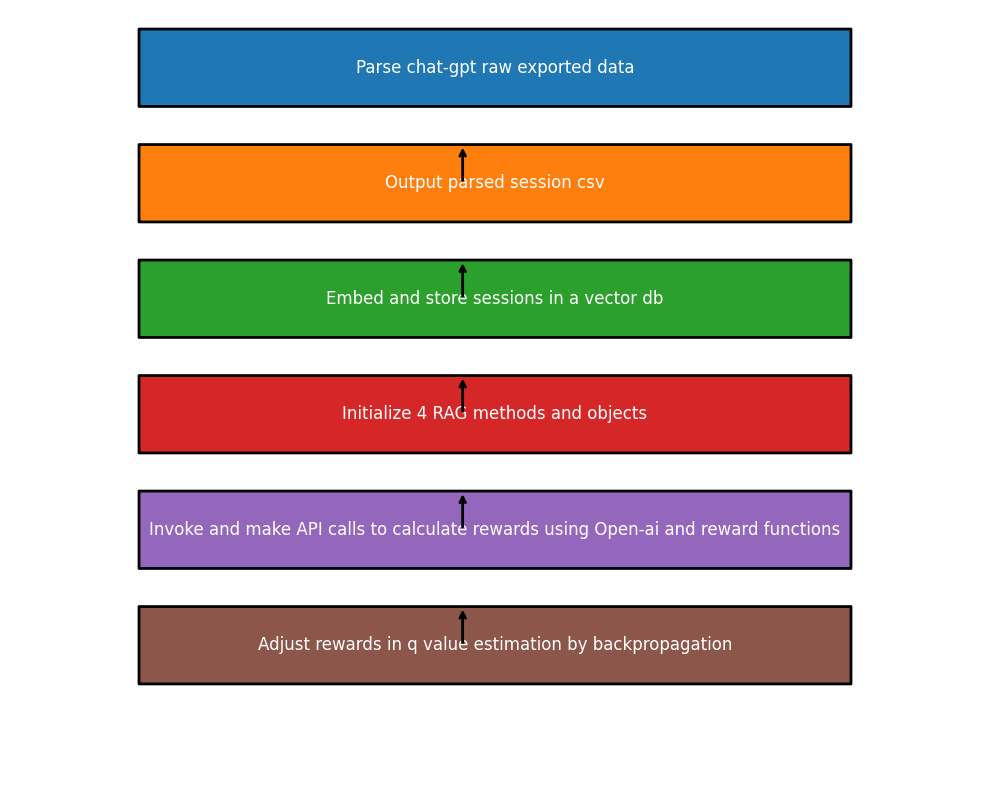

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Define a simple function to draw a rectangle with text inside
def draw_box(ax, text, coords, color):
    box = FancyBboxPatch((coords[0], coords[1]), 220, 40, boxstyle="round,pad=0.1", ec="black", fc=color, lw=2)
    ax.add_patch(box)
    ax.text(coords[0] + 110, coords[1] + 20, text, ha='center', va='center', fontsize=12, color='white')

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(0, 300)
ax.set_ylim(0, 400)
plt.axis('off')

# Draw the boxes for each step
steps = [
    "Parse chat-gpt raw exported data",
    "Output parsed session csv",
    "Embed and store sessions in a vector db",
    "Initialize 4 RAG methods and objects",
    "Invoke and make API calls to calculate rewards using Open-ai and reward functions",
    "Adjust rewards in q value estimation by backpropagation"
]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Draw the boxes with the steps
for i, (step, color) in enumerate(zip(steps[::-1], colors[::-1])):  # Reverse to draw from bottom to top
    draw_box(ax, step, (40, i * 60 + 50), color)

# Draw arrows
for i in range(len(steps)-1):
    ax.annotate("",
                xy=(140, i * 60 + 90), xycoords='data',
                xytext=(140, i * 60 + 70), textcoords='data',
                arrowprops=dict(arrowstyle="->", lw=2.0))

# Save the figure
plt.tight_layout()
plt.savefig('/mnt/data/training_pipeline_flowchart.png', bbox_inches='tight')
plt.show()


[0.         0.14818059 0.3647311  0.46490825 0.61869314 0.85592175
 0.        ]


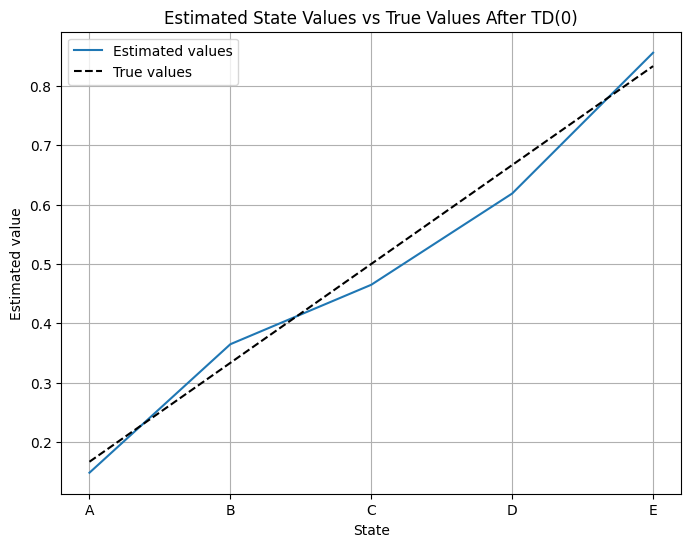

MovieWriter imagemagick unavailable; using Pillow instead.


'TD_learning_correct.gif'

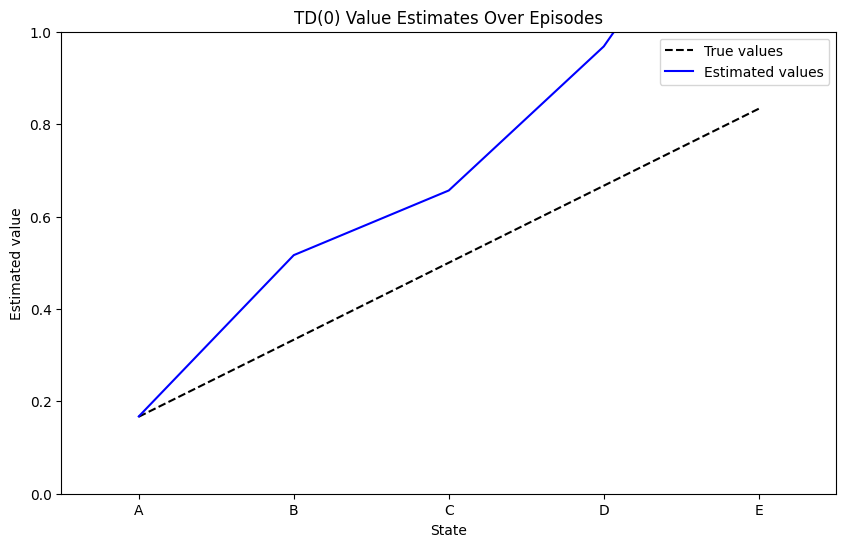

In [1]:
import os
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

states = ["T1", "A", "B", "C", "D", "E", "T2"]  # All states including terminal states
n_states = len(states) - 2  # Number of non-terminal states
V = np.zeros(n_states + 2)  # The value estimates for states including the terminal states
alpha = 0.1  # Learning rate
episodes = 100  # Number of episodes
gamma = 1  # Discount factor

def run_episode():
    global V
    current_state = n_states // 2   # Start from the middle state C (index 3 if considering 5 non-terminal states)
    
    # Loop until we reach a termination condition
    while 0 < current_state < n_states + 1:
        # Take action (0.5 probability of going left or right)
        action = -1 if np.random.rand() < 0.5 else 1
        next_state = current_state + action

        # Initialize reward as 0
        reward = 0

        # Check for termination conditions
        if current_state == n_states and action == 1:  # Moving right from E to T2
            reward = 1  # Reward of 1 for moving into the right terminal state from E
            V[current_state] += alpha * (reward + gamma * V[next_state] - V[current_state])
            break  # End the episode
        elif current_state == 1 and action == -1:  # Moving left from A to T1
            # Reward is 0 for moving into the left terminal state from A, already initialized
            V[current_state] += alpha * (reward + gamma * V[next_state] - V[current_state])
            break  # End the episode
        else:
            # Update value estimate using TD(0) for non-terminal transitions
            V[current_state] += alpha * (reward + gamma * V[next_state] - V[current_state])

        # Move to the next state unless we have reached the terminal state
        current_state = next_state

# Running TD(0) Learning for plotting purposes
for episode in range(episodes):
    run_episode()
print(V)

V_estimate = V[1:-1]

# True probabilities for the states reaching the right terminal state T2
true_values = np.array([1/6, 2/6, 3/6, 4/6, 5/6])

# Adjusted to start from A to E for plotting
adjusted_states = states[1:-1]

# Plot the estimated values and the true values
plt.figure(figsize=(8, 6))
plt.plot(adjusted_states, V_estimate, label='Estimated values')
plt.plot(adjusted_states, true_values, 'k--', label='True values')
plt.xlabel('State')
plt.ylabel('Estimated value')
plt.title('Estimated State Values vs True Values After TD(0)')
plt.legend()
plt.grid(True)
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
# Plot the true values once as they do not change
plt.plot(adjusted_states, true_values, 'k--', label='True values')  # Static line for true values
# Prepare a line object for estimated values to be updated in the animation
lines, = plt.plot(adjusted_states, np.zeros(n_states), 'b-', label='Estimated values')  # Dynamic line for estimated values
plt.xlim(-0.5, n_states - 0.5)
plt.xticks(range(n_states), adjusted_states)  # Show state names on x-axis
plt.ylim(0, 1)
plt.xlabel('State')
plt.ylabel('Estimated value')
plt.title('TD(0) Value Estimates Over Episodes')
plt.legend()
V = np.zeros(n_states + 2)  # Reset the value estimates for the states
V[-1] = 1  # Reward of 1 for the right terminal state

# Initialize the values for animation
episode_values = []  # To store value estimates for each episode

# Function to update the plot for each frame
def update(frame):
    global V
    run_episode()
    episode_values.append(V[1:-1].copy())  # Save the current value estimates

    # Update the lines for the plot
    lines.set_ydata(episode_values[-1])
    return lines,

# Number of frames is equal to the number of episodes
num_frames = 100  # Adjusted to match the number of episodes for demonstration

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, blit=True, repeat=False)

# Note: To save the animation, ensure you have ImageMagick installed and properly configured.
# Save the animation as a GIF
gif_path = 'TD_learning_correct.gif'
ani.save(gif_path, writer='imagemagick', fps=10)

# Display the location of the saved GIF
gif_path
